# Import Library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Setup Completed')

Setup Completed


# Task 2: Analyze the Raw Data:

In [2]:
df = pd.read_csv('BDS-RawData.csv')
df

,event_timestamp,user_id,city_id,city,session_id,service,promo_code,app_version,device_type,platform,carrier,os,event_type,attributes
0,2022-10-11T00:00:23.892Z,84878755195,NaN,NaN,81a739b3-AE395525-20221010-170023791,NaN,NaN,8.17.14,iPhone,iOS,Viettel,iOS 14.8.1,Notification_order_complete_system_show,"{""app_version"":""8.17.14"",""os"":""iOS 14.8.1"",""de..."
1,2022-10-11T00:00:49.22Z,84973748869,NaN,NaN,81a739b3-56671506-20221010-170049164,NaN,NaN,8.18.1721,iPhone,iOS,Viettel,iOS 15.6.1,App_start,"{""app_version"":""8.18.1721"",""os"":""iOS 15.6.1"",""..."
2,2022-10-11T00:00:50.098Z,84355933878,NaN,NaN,81a739b3-244C2F55-20221010-134427278,NaN,NaN,8.17.14,iPhone,iOS,NaN,iOS 15.1,_session.stop,"{""app_version"":""8.17.14"",""os"":""iOS 15.1"",""devi..."
3,2022-10-11T00:01:00.994Z,84962698888,NaN,NaN,81a739b3-D5D3CFDD-20221010-170100879,NaN,NaN,8.18.1721,iPhone,iOS,Viettel,iOS 15.5,Notification_order_complete_system_show,"{""app_version"":""8.18.1721"",""os"":""iOS 15.5"",""de..."
4,2022-10-11T00:01:17.776Z,84793758561,NaN,NaN,81a739b3-E3AAC919-20221010-170117726,NaN,NaN,8.17.14,iPhone,iOS,Mobifone,iOS 16.0,App_start,"{""app_version"":""8.17.14"",""os"":""iOS 16.0"",""devi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2022-10-11T07:33:43.505Z,84907394047,NaN,NaN,81a739b3-D7885C4A-20221011-003200904,NaN,NaN,8.18.1721,iPhone,iOS,NaN,iOS 14.8,_session.stop,"{""app_version"":""8.18.1721"",""os"":""iOS 14.8"",""de..."
99996,2022-10-11T07:33:43.507Z,84907394047,NaN,NaN,81a739b3-D7885C4A-20221011-003343506,NaN,NaN,8.18.1721,iPhone,iOS,NaN,iOS 14.8,_session.start,"{""app_version"":""8.18.1721"",""os"":""iOS 14.8"",""de..."
99997,2022-10-11T07:33:43.521Z,84937976482,SGN,Ho Chi Minh City City,81a739b3-FE1CE6BB-20221011-003326952,NaN,NaN,8.18.1721,iPhone,iOS,Viettel,iOS 15.6.1,PlaceOrder_add_promo_code,"{""app_version"":""8.18.1721"",""os"":""iOS 15.6.1"",""..."
99998,2022-10-11T07:33:43.644Z,84908666213,SGN,Ho Chi Minh City City,81a739b3-C81474FA-20221011-003339067,NaN,NaN,8.17.14,iPhone,iOS,Mobifone,iOS 14.4.1,Records_item_clicked,"{""app_version"":""8.17.14"",""os"":""iOS 14.4.1"",""de..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_timestamp  100000 non-null  object
 1   user_id          100000 non-null  int64 
 2   city_id          57683 non-null   object
 3   city             53707 non-null   object
 4   session_id       100000 non-null  object
 5   service          1790 non-null    object
 6   promo_code       3518 non-null    object
 7   app_version      99918 non-null   object
 8   device_type      95562 non-null   object
 9   platform         99974 non-null   object
 10  carrier          58275 non-null   object
 11  os               99918 non-null   object
 12  event_type       100000 non-null  object
 13  attributes       100000 non-null  object
dtypes: int64(1), object(13)
memory usage: 10.7+ MB


In [4]:
df.describe()

,user_id
count,1.000000e+05
mean,8.480590e+10
std,2.287219e+08
min,8.432509e+10
25%,8.477662e+10
50%,8.490945e+10
75%,8.496255e+10
max,8.499736e+10


# Data Cleaning:

In [5]:
df.isnull().sum()

event_timestamp        0
user_id                0
city_id            42317
city               46293
session_id             0
service            98210
promo_code         96482
app_version           82
device_type         4438
platform              26
carrier            41725
os                    82
event_type             0
attributes             0
dtype: int64

In [6]:
df.duplicated().sum()

218

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.fillna('Not Available')
df.isnull().sum()

event_timestamp    0
user_id            0
city_id            0
city               0
session_id         0
service            0
promo_code         0
app_version        0
device_type        0
platform           0
carrier            0
os                 0
event_type         0
attributes         0
dtype: int64

## DAU via Platform:

In [19]:
df_platform = df[['user_id', 'device_type','platform']]
df_platform

,user_id,device_type,platform
0,84878755195,iPhone,iOS
1,84973748869,iPhone,iOS
2,84355933878,iPhone,iOS
3,84962698888,iPhone,iOS
4,84793758561,iPhone,iOS
...,...,...,...
99995,84907394047,iPhone,iOS
99996,84907394047,iPhone,iOS
99997,84937976482,iPhone,iOS
99998,84908666213,iPhone,iOS


In [20]:
df_platform['platform'].unique()

array(['iOS', 'android', 'web', 'Not Available'], dtype=object)

In [27]:
df_platform = df_platform[df_platform['platform'] != 'Not Available']
df_platform

,user_id,device_type,platform
0,84878755195,iPhone,iOS
1,84973748869,iPhone,iOS
2,84355933878,iPhone,iOS
3,84962698888,iPhone,iOS
4,84793758561,iPhone,iOS
...,...,...,...
99995,84907394047,iPhone,iOS
99996,84907394047,iPhone,iOS
99997,84937976482,iPhone,iOS
99998,84908666213,iPhone,iOS


In [28]:
df_platform = df_platform.drop_duplicates()

In [29]:
df_platform.duplicated().sum()

0

In [42]:
count_platform = df_platform.groupby('platform').count()['user_id'].sort_values(ascending = False)
count_platform

# The iOS had the highest DAU via platform.

platform
iOS        3218
android     125
web          38
Name: user_id, dtype: int64

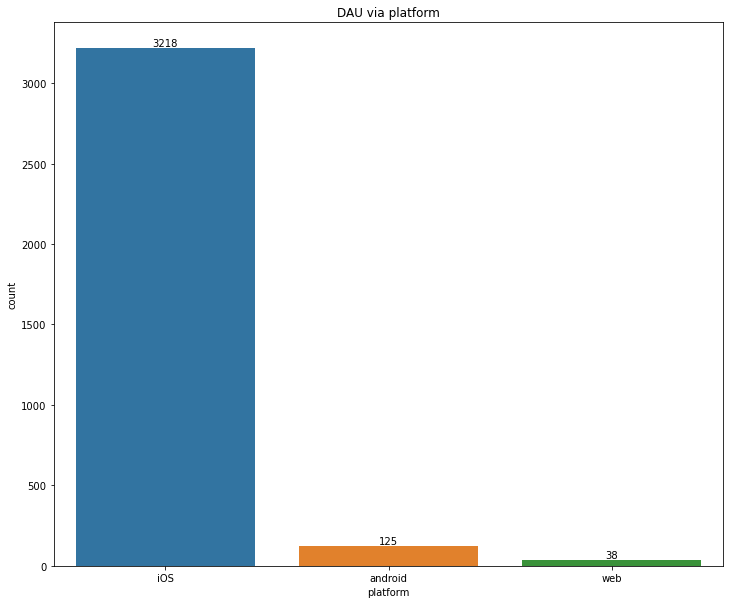

In [248]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_platform['platform'], order = count_platform.index)
ax.bar_label(ax.containers[0])
plt.title('DAU via platform')
plt.show()

## DAU via Service:

In [32]:
df_service = df[['user_id', 'service']]
df_service

,user_id,service
0,84878755195,Not Available
1,84973748869,Not Available
2,84355933878,Not Available
3,84962698888,Not Available
4,84793758561,Not Available
...,...,...
99995,84907394047,Not Available
99996,84907394047,Not Available
99997,84937976482,Not Available
99998,84908666213,Not Available


In [39]:
df_service = df_service[df_service['service'] != 'Not Available']
df_service

,user_id,service
33,84909955897,SGN-BIKE
301,84909056958,SGN-BIKE
376,84931555592,HAN-SAMEDAY
544,84915062535,SGN-BIKE
573,84338533786,SGN-SAMEDAY
...,...,...
99742,84932189460,HAN-BIKE
99781,84902772792,SGN-BIKE
99905,84902831566,SGN-BIKE
99947,84938154512,SGN-EXPRESS


In [35]:
df_service = df_service.drop_duplicates()

In [181]:
df_service.duplicated().sum()

0

In [33]:
df_service['service'].unique()

array(['Not Available', 'SGN-BIKE', 'HAN-SAMEDAY', 'SGN-SAMEDAY',
       'HAN-BIKE', 'HAN-AHAPRO', 'SGN-POOL', 'SGN-INTERCT-GHN',
       'HAN-EXPRESS', 'SGN-EXPRESS', 'SGN-PICKUP-TRUCK', 'HAN-POOL',
       'HAN-INTERCT-GHN', 'SGN-TRUCK-500', 'HAN-2H-PUBLIC', 'SGN-AHAPRO',
       'SGN-2H-PUBLIC', 'BMV-BIKE', 'SGN-VAN-500', 'HAN-RENT-BIKE',
       'VII-BIKE', 'DAD-BIKE', 'BMV-POOL', 'SGN-TRUCK-1000', 'HUI-BIKE',
       'CXR-BIKE', 'SGN-TRICYCLE', 'VCA-BIKE', 'HAN-PICKUP-TRUCK',
       'SGN-VAN-1000', 'VCA-POOL', 'HUI-EXPRESS', 'VCA-EXPRESS',
       'HUI-POOL', 'VII-POOL', 'SGN-BDG-SAMEDAY', 'TGG-BIKE',
       'CXR-EXPRESS'], dtype=object)

In [41]:
count_service = df_service.groupby('service').count()['user_id'].sort_values(ascending = False)
count_service

# SGN-Bike had the highest DAU via Service.

service
SGN-BIKE            277
HAN-BIKE            186
SGN-POOL             79
SGN-SAMEDAY          60
HAN-SAMEDAY          48
HAN-POOL             47
SGN-EXPRESS          19
HAN-EXPRESS          17
SGN-PICKUP-TRUCK     10
HAN-AHAPRO            7
SGN-AHAPRO            6
SGN-VAN-500           4
HAN-2H-PUBLIC         4
SGN-2H-PUBLIC         4
SGN-INTERCT-GHN       4
SGN-TRICYCLE          4
HUI-BIKE              3
BMV-POOL              3
TGG-BIKE              2
VCA-POOL              2
VII-BIKE              2
BMV-BIKE              2
HAN-INTERCT-GHN       2
DAD-BIKE              2
CXR-BIKE              2
SGN-BDG-SAMEDAY       1
HUI-POOL              1
HUI-EXPRESS           1
HAN-RENT-BIKE         1
HAN-PICKUP-TRUCK      1
SGN-TRUCK-1000        1
SGN-TRUCK-500         1
SGN-VAN-1000          1
VCA-BIKE              1
VCA-EXPRESS           1
CXR-EXPRESS           1
VII-POOL              1
Name: user_id, dtype: int64

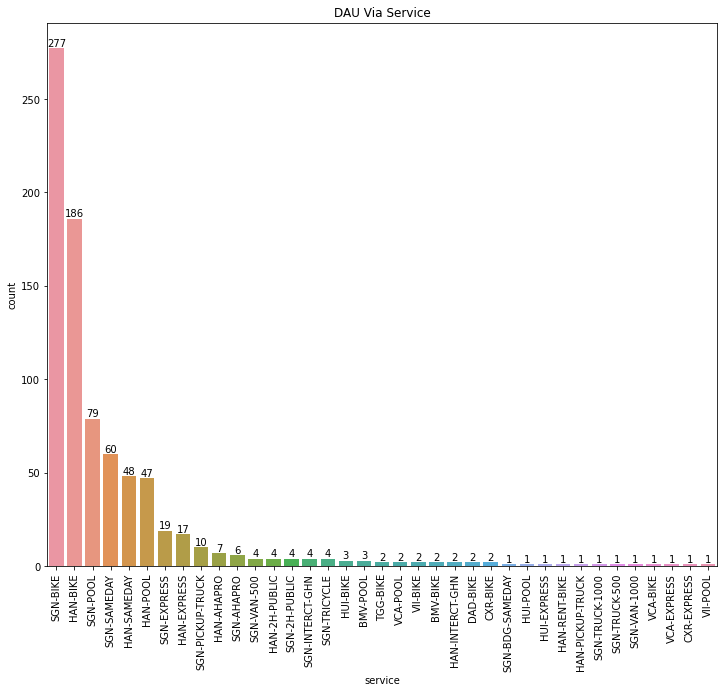

In [246]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_service['service'], order = count_service.index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('DAU Via Service')
plt.show()

## DAU via City:

In [233]:
df_city = df[['user_id', 'city_id','city']]
df_city

,user_id,city_id,city
0,84878755195,Not Available,Not Available
1,84973748869,Not Available,Not Available
2,84355933878,Not Available,Not Available
3,84962698888,Not Available,Not Available
4,84793758561,Not Available,Not Available
...,...,...,...
99995,84907394047,Not Available,Not Available
99996,84907394047,Not Available,Not Available
99997,84937976482,SGN,Ho Chi Minh City City
99998,84908666213,SGN,Ho Chi Minh City City


In [234]:
df_city = df_city.drop_duplicates()
df_city

,user_id,city_id,city
0,84878755195,Not Available,Not Available
1,84973748869,Not Available,Not Available
2,84355933878,Not Available,Not Available
3,84962698888,Not Available,Not Available
4,84793758561,Not Available,Not Available
...,...,...,...
99817,84909957928,SGN,Not Available
99861,84949222533,SGN,Not Available
99863,84966680842,Not Available,Not Available
99916,84966680842,HAN,Not Available


In [240]:
df_city = df_city[df_city['city_id'] != 'Not Available']
df_city

,user_id,city_id,city
16,84985554483,HAN,Hanoi City
23,84982140291,HAN,Hanoi City
26,84918081994,HAN,Hanoi City
28,84924030803,SGN,Ho Chi Minh City
29,84393365941,HAN,Hanoi City
...,...,...,...
99716,84376440001,SGN,Ho Chi Minh City
99817,84909957928,SGN,Ho Chi Minh City
99861,84949222533,SGN,Ho Chi Minh City
99916,84966680842,HAN,Hanoi City


In [235]:
df_city.duplicated().sum()

0

In [236]:
df_city = df_city[df_city['city_id'] != '[]']
df_city = df_city[df_city['city_id'] != '[Ljava.lang.String;@fc0f8f5']
df_city = df_city[df_city['city_id'] != '[Ljava.lang.String;@db63102']
df_city = df_city[df_city['city_id'] != '[SGN,HAN]']
df_city = df_city[df_city['city_id'] != '[HAN,SGN]']
df_city = df_city[df_city['city_id'] != '[Ljava.lang.String;@c68c2d0']
df_city = df_city[df_city['city_id'] != '[Ljava.lang.String;@7144a64']
df_city

,user_id,city_id,city
0,84878755195,Not Available,Not Available
1,84973748869,Not Available,Not Available
2,84355933878,Not Available,Not Available
3,84962698888,Not Available,Not Available
4,84793758561,Not Available,Not Available
...,...,...,...
99817,84909957928,SGN,Not Available
99861,84949222533,SGN,Not Available
99863,84966680842,Not Available,Not Available
99916,84966680842,HAN,Not Available


In [241]:
df_city['city'].loc[(df_city['city_id'] == 'SGN')] = 'Ho Chi Minh City'
df_city['city'].loc[(df_city['city_id'] == 'KUL')] = 'Ho Chi Minh City'
df_city['city'].loc[(df_city['city_id'] == 'XLO')] = 'Ho Chi Minh City'
df_city['city'].loc[(df_city['city_id'] == 'TGG')] = 'Ho Chi Minh City'
df_city['city'].loc[(df_city['city'] == 'Ho Chi Minh City City')] = 'Ho Chi Minh City'
df_city['city'].loc[(df_city['city_id'] == 'HAN')] = 'Hanoi City'
df_city['city'].loc[(df_city['city_id'] == 'TNG')] = 'Hanoi City'
df_city['city'].loc[(df_city['city_id'] == 'DAD')] = 'Da Nang City'
df_city['city'].loc[(df_city['city_id'] == 'VII')] = 'Vinh City'
df_city['city'].loc[(df_city['city_id'] == 'VCA')] = 'Can Tho City'
df_city['city'].loc[(df_city['city_id'] == 'HUI')] = 'Hue City'
df_city['city'].loc[(df_city['city_id'] == 'BMV')] = 'Buon Ma Thuot City'
df_city['city'].loc[(df_city['city_id'] == 'CXR')] = 'Nha Trang City'
df_city['city_id'].loc[(df_city['city_id'] == '[SGN]')] = 'SGN'
df_city['city_id'].loc[(df_city['city_id'] == '[HAN]')] = 'HAN'
df_city['city_id'].loc[(df_city['city_id'] == '[DAD]')] = 'DAD'
df_city['city_id'].loc[(df_city['city_id'] == '[VII]')] = 'VII'
df_city['city_id'].loc[(df_city['city_id'] == '[VCA]')] = 'VCA'

/Users/ricardokaizen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [238]:
df_city['city_id'].unique()

array(['Not Available', 'HAN', 'SGN', 'HUI', 'VCA', 'KUL', 'XLO', 'DLI',
       'DAD', 'BHC', 'BMV', 'VII', 'HDG', 'CXR', 'TGG', 'TNG'],
      dtype=object)

In [278]:
df_city['city'].unique()

array(['Hanoi City', 'Ho Chi Minh City', 'Hue City', 'Can Tho City',
       'Da Nang City', 'Buon Ma Thuot City', 'Vinh City',
       'Nha Trang City'], dtype=object)

In [174]:
df_city[df_city['city_id'] == 'TNG']

,user_id,city_id,city
80111,84379801593,TNG,Hanoi City
80130,84379801593,TNG,Hanoi City
91351,84965257228,TNG,Hanoi City
91828,84965257228,TNG,Hanoi City


In [242]:
df_city

,user_id,city_id,city
16,84985554483,HAN,Hanoi City
23,84982140291,HAN,Hanoi City
26,84918081994,HAN,Hanoi City
28,84924030803,SGN,Ho Chi Minh City
29,84393365941,HAN,Hanoi City
...,...,...,...
99716,84376440001,SGN,Ho Chi Minh City
99817,84909957928,SGN,Ho Chi Minh City
99861,84949222533,SGN,Ho Chi Minh City
99916,84966680842,HAN,Hanoi City


In [243]:
count_city = df_city.groupby('city').count()['user_id'].sort_values(ascending = False)
count_city

# Ho Chi Minh City had the most DAU via city.

city
Ho Chi Minh City      2003
Hanoi City            1403
Da Nang City            22
Buon Ma Thuot City      15
Can Tho City            14
Hue City                13
Nha Trang City          10
Vinh City                6
Name: user_id, dtype: int64

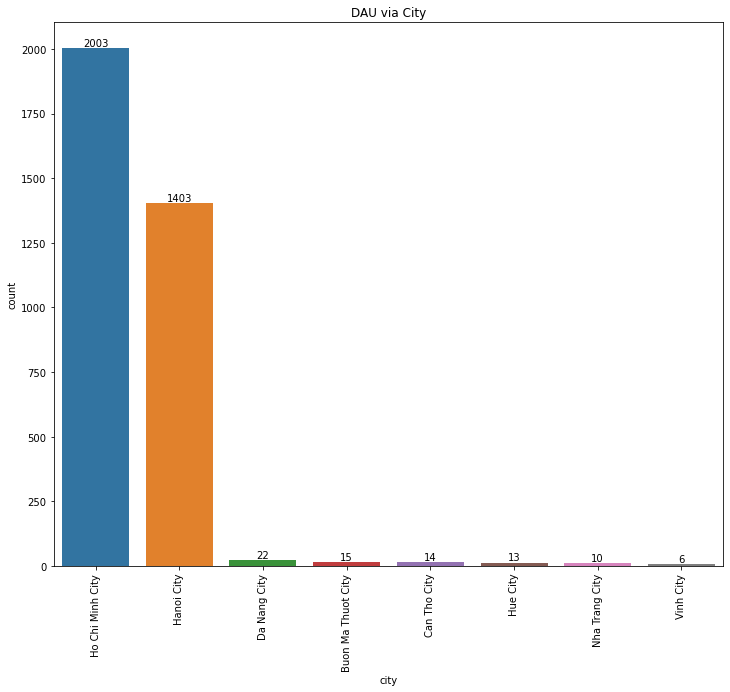

In [249]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_city['city'], order = count_city.index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('DAU via City')
plt.show()

## Promo Code:

### Promo via City:

In [193]:
df_promo = df[['user_id','promo_code', 'event_type']]
df_promo

,user_id,promo_code,event_type
0,84878755195,Not Available,Notification_order_complete_system_show
1,84973748869,Not Available,App_start
2,84355933878,Not Available,_session.stop
3,84962698888,Not Available,Notification_order_complete_system_show
4,84793758561,Not Available,App_start
...,...,...,...
99995,84907394047,Not Available,_session.stop
99996,84907394047,Not Available,_session.start
99997,84937976482,Not Available,PlaceOrder_add_promo_code
99998,84908666213,Not Available,Records_item_clicked


In [197]:
df_promo.duplicated().sum()

60303

In [198]:
df_promo = df_promo.drop_duplicates()
df_promo

,user_id,promo_code,event_type
0,84878755195,Not Available,Notification_order_complete_system_show
1,84973748869,Not Available,App_start
2,84355933878,Not Available,_session.stop
3,84962698888,Not Available,Notification_order_complete_system_show
4,84793758561,Not Available,App_start
...,...,...,...
99993,84937976482,Not Available,NewOrder_continue
99995,84907394047,Not Available,_session.stop
99996,84907394047,Not Available,_session.start
99997,84937976482,Not Available,PlaceOrder_add_promo_code


In [199]:
df_promo['promo_code'].unique()

array(['Not Available', '4H22K', 'nil', 'Optional("4H22K")', 'AHAMOVEM10',
       'AHAPROLOSS', 'AHA50%', 'Optional("AHAMOVEM10")', 'AHA30%',
       'HAN22', 'HELLOLA', 'HPTRUCK10', 'ƒêG12K', 'SAYHI', 'ZALOPAY1022',
       'Optional("HELLO20K")', 'Optional("AHA15KGIAM")',
       'Optional("DON25K")', 'AHAMOVE03', 'TRUCK10SU', 'TRUCKNW10W1',
       '68NAMTHUDO', 'TRUNGTHU9K', 'AHAMOVEK5', 'CHAOAHA', 'AHAPROORG',
       'BACNINHT10', 'BACNINH10', 'AHA30', 'AHA1215', 'HAIPHONGT10',
       'NHOBAN10L', 'GIAMTOIBEN', 'DON100', 'DINHCAO4H', 'LE10W2157',
       'AHAMOVE04', 'AHALOVEOCT', 'BDBHT10', 'LONGAN10K', 'VUNGTAUT10',
       'MYHINEW', 'Optional("TRUCKNW10W1")', 'Optional("68NAMTHUDO")',
       'Optional("MUATO50K")', 'AHAPROKA', 'AHAPROM9',
       'Optional("AHAPROM9")', 'LA100K', 'AHAMOVE10', 'ZALOPAY0922',
       'BUNGNO', 'GIAMTHAGA', 'HELLOVINH', 'TRCLM101', 'DANANGT10',
       'GRKA70', 'LONG92', '10AHA10', 'TRUCK10CV', 'VINHT10',
       'GIAOHANG10K', 'SECHIA', 'Optional("VUNGTA

In [200]:
df_promocity = df_promo.merge(df_city, how = 'inner', on = 'user_id')
df_promocity

,user_id,promo_code,event_type,city_id,city
0,84918081994,Not Available,_session.stop,HAN,Hanoi City
1,84918081994,Not Available,Records_item_clicked,HAN,Hanoi City
2,84918081994,Not Available,_session.start,HAN,Hanoi City
3,84918081994,Not Available,Screen_OrderDetail,HAN,Hanoi City
4,84767712189,Not Available,App_start,SGN,Ho Chi Minh City
...,...,...,...,...,...
62218,84949222533,Not Available,Home_add_stop_point,SGN,Ho Chi Minh City
62219,84949222533,Not Available,Screen_SearchLocation,SGN,Ho Chi Minh City
62220,84949222533,Not Available,Screen_SearchLocation,SGN,Ho Chi Minh City
62221,84966680842,Not Available,App_start,HAN,Hanoi City


In [202]:
df_nopromo = df_promocity[df_promocity['promo_code'] == 'Not Available']
df_nopromo

,user_id,promo_code,event_type,city_id,city
0,84918081994,Not Available,_session.stop,HAN,Hanoi City
1,84918081994,Not Available,Records_item_clicked,HAN,Hanoi City
2,84918081994,Not Available,_session.start,HAN,Hanoi City
3,84918081994,Not Available,Screen_OrderDetail,HAN,Hanoi City
4,84767712189,Not Available,App_start,SGN,Ho Chi Minh City
...,...,...,...,...,...
62218,84949222533,Not Available,Home_add_stop_point,SGN,Ho Chi Minh City
62219,84949222533,Not Available,Screen_SearchLocation,SGN,Ho Chi Minh City
62220,84949222533,Not Available,Screen_SearchLocation,SGN,Ho Chi Minh City
62221,84966680842,Not Available,App_start,HAN,Hanoi City


In [250]:
count_npc = df_nopromo.groupby('city').count()['user_id'].sort_values(ascending =False)
count_npc

city
Ho Chi Minh City      34779
Hanoi City            22808
Buon Ma Thuot City      307
Hue City                281
Da Nang City            276
Can Tho City            253
Nha Trang City          252
Vinh City               180
Name: user_id, dtype: int64

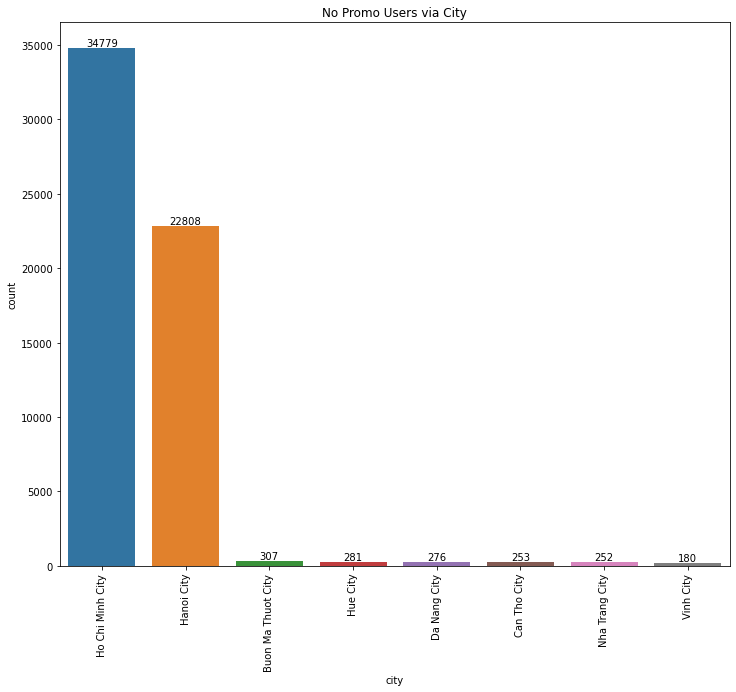

In [253]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_nopromo['city'], order = count_npc.index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('No Promo Users via City')
plt.show()

In [204]:
df_usepromo = df_promocity[df_promocity['promo_code'] != 'Not Available']
df_usepromo

,user_id,promo_code,event_type,city_id,city
70,84901122461,AHAMOVEM10,MyPromoCode_click_btn_UseNow,SGN,Ho Chi Minh City
71,84901122461,AHAMOVEM10,MyPromoCode_click_btn_UseNow,SGN,Ho Chi Minh City
72,84901122461,AHAMOVEM10,PlaceOrder_add_promo_code,SGN,Ho Chi Minh City
73,84901122461,AHAMOVEM10,PlaceOrder_add_promo_code,SGN,Ho Chi Minh City
74,84901122461,AHAMOVEM10,PlaceOrder_inform_promo,SGN,Ho Chi Minh City
...,...,...,...,...,...
61806,84969344856,AHAMOVEM10,PlaceOrder_book_btn,HAN,Hanoi City
62035,84798050997,AHA6KGIAM,PlaceOrder_add_promo_code,VCA,Can Tho City
62036,84798050997,AHA6KGIAM,PlaceOrder_add_promo_code,VCA,Can Tho City
62039,84798050997,AHA6KGIAM,PlaceOrder_book_btn,VCA,Can Tho City


In [252]:
count_upc = df_usepromo.groupby('city').count()['user_id'].sort_values(ascending =False)
count_upc

city
Ho Chi Minh City      1738
Hanoi City            1131
Hue City                58
Buon Ma Thuot City      50
Can Tho City            32
Nha Trang City          30
Vinh City               28
Da Nang City            20
Name: user_id, dtype: int64

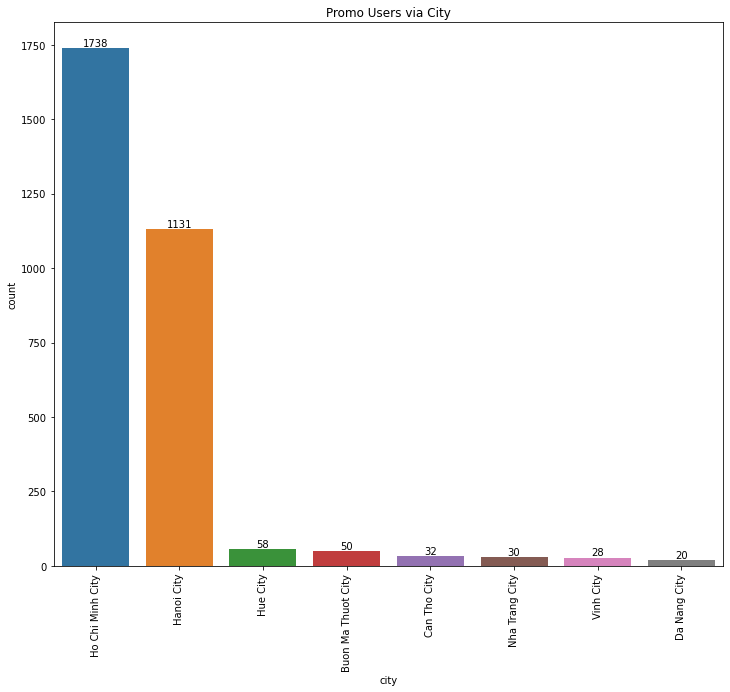

In [254]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_usepromo['city'], order = count_upc.index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Promo Users via City')
plt.show()

### Promo via Service:

In [217]:
df_promoservice = df_promo.merge(df_service, how = 'inner', on = 'user_id')
df_promoservice

,user_id,promo_code,event_type,service
0,84901122461,Not Available,_session.start,SGN-BIKE
1,84901122461,Not Available,_session.stop,SGN-BIKE
2,84901122461,Not Available,_session.resume,SGN-BIKE
3,84901122461,Not Available,_session.pause,SGN-BIKE
4,84901122461,Not Available,App_start,SGN-BIKE
...,...,...,...,...
27164,84798050997,Not Available,PlaceOrder_order_created,VCA-POOL
27165,84798050997,Not Available,PlaceOrder_add_promo_code,VCA-POOL
27166,84798050997,Not Available,_session.stop,VCA-POOL
27167,84798050997,Not Available,_session.start,VCA-POOL


In [218]:
df_promoservice = df_promoservice.drop_duplicates()
df_promoservice

,user_id,promo_code,event_type,service
0,84901122461,Not Available,_session.start,SGN-BIKE
1,84901122461,Not Available,_session.stop,SGN-BIKE
2,84901122461,Not Available,_session.resume,SGN-BIKE
3,84901122461,Not Available,_session.pause,SGN-BIKE
4,84901122461,Not Available,App_start,SGN-BIKE
...,...,...,...,...
27164,84798050997,Not Available,PlaceOrder_order_created,VCA-POOL
27165,84798050997,Not Available,PlaceOrder_add_promo_code,VCA-POOL
27166,84798050997,Not Available,_session.stop,VCA-POOL
27167,84798050997,Not Available,_session.start,VCA-POOL


In [219]:
df_nopromo_s = df_promoservice[df_promoservice['promo_code'] == 'Not Available']
df_nopromo_s

,user_id,promo_code,event_type,service
0,84901122461,Not Available,_session.start,SGN-BIKE
1,84901122461,Not Available,_session.stop,SGN-BIKE
2,84901122461,Not Available,_session.resume,SGN-BIKE
3,84901122461,Not Available,_session.pause,SGN-BIKE
4,84901122461,Not Available,App_start,SGN-BIKE
...,...,...,...,...
27164,84798050997,Not Available,PlaceOrder_order_created,VCA-POOL
27165,84798050997,Not Available,PlaceOrder_add_promo_code,VCA-POOL
27166,84798050997,Not Available,_session.stop,VCA-POOL
27167,84798050997,Not Available,_session.start,VCA-POOL


In [260]:
count_nps = df_nopromo_s.groupby('service').count()['promo_code'].sort_values(ascending = False).head(10)
count_nps

service
SGN-BIKE            8565
HAN-BIKE            5735
SGN-POOL            2360
SGN-SAMEDAY         1780
HAN-SAMEDAY         1575
HAN-POOL            1535
SGN-EXPRESS          594
HAN-EXPRESS          523
SGN-PICKUP-TRUCK     363
HAN-AHAPRO           243
Name: promo_code, dtype: int64

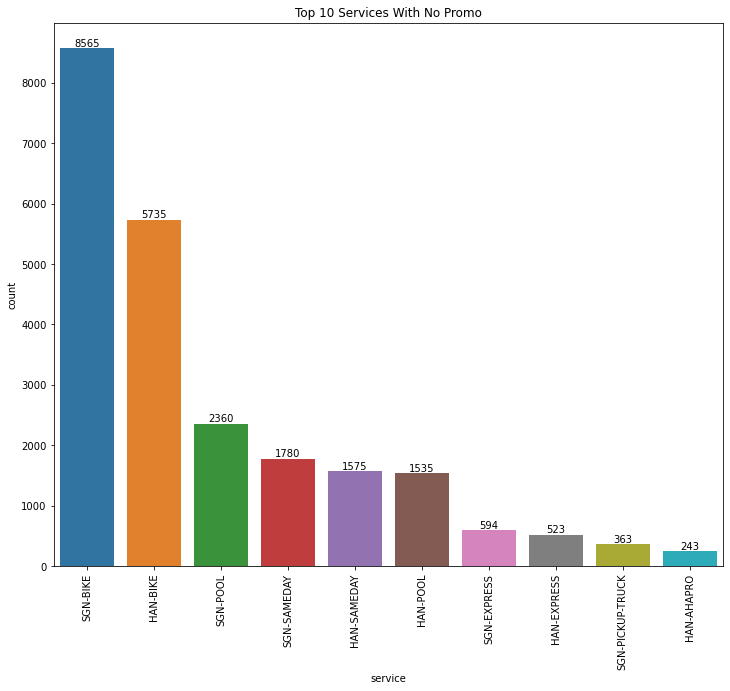

In [261]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_nopromo_s['service'], order = count_nps.index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 Services With No Promo')
plt.show()

In [225]:
df_nopromo_s.groupby('service').count()['promo_code'].sort_values(ascending = False).tail(10)

service
SGN-VAN-1000        40
HAN-RENT-BIKE       39
VII-POOL            39
VCA-BIKE            38
HUI-POOL            31
HAN-PICKUP-TRUCK    31
CXR-EXPRESS         31
VCA-EXPRESS         31
SGN-BDG-SAMEDAY     26
HUI-EXPRESS         24
Name: promo_code, dtype: int64

In [226]:
df_usepromo_s = df_promoservice[df_promoservice['promo_code'] != 'Not Available']
df_usepromo_s

,user_id,promo_code,event_type,service
31,84901122461,AHAMOVEM10,MyPromoCode_click_btn_UseNow,SGN-BIKE
32,84901122461,AHAMOVEM10,PlaceOrder_add_promo_code,SGN-BIKE
33,84901122461,AHAMOVEM10,PlaceOrder_inform_promo,SGN-BIKE
34,84901122461,AHAMOVEM10,PlaceOrder_book_btn,SGN-BIKE
52,84965892950,AHAMOVEM10,PlaceOrder_add_promo_code,HAN-BIKE
...,...,...,...,...
26911,84973940835,THANTHIET10,PlaceOrder_book_btn,SGN-BIKE
27123,84969344856,AHAMOVEM10,PlaceOrder_add_promo_code,HAN-BIKE
27125,84969344856,AHAMOVEM10,PlaceOrder_book_btn,HAN-BIKE
27161,84798050997,AHA6KGIAM,PlaceOrder_add_promo_code,VCA-POOL


In [262]:
count_ups = df_usepromo_s.groupby('service').count()['user_id'].sort_values(ascending = False).head(10)
count_ups

service
SGN-BIKE            575
HAN-BIKE            390
SGN-SAMEDAY         198
HAN-SAMEDAY         175
SGN-POOL            147
HAN-POOL            121
SGN-EXPRESS          50
HAN-EXPRESS          39
SGN-PICKUP-TRUCK     29
HAN-AHAPRO           23
Name: user_id, dtype: int64

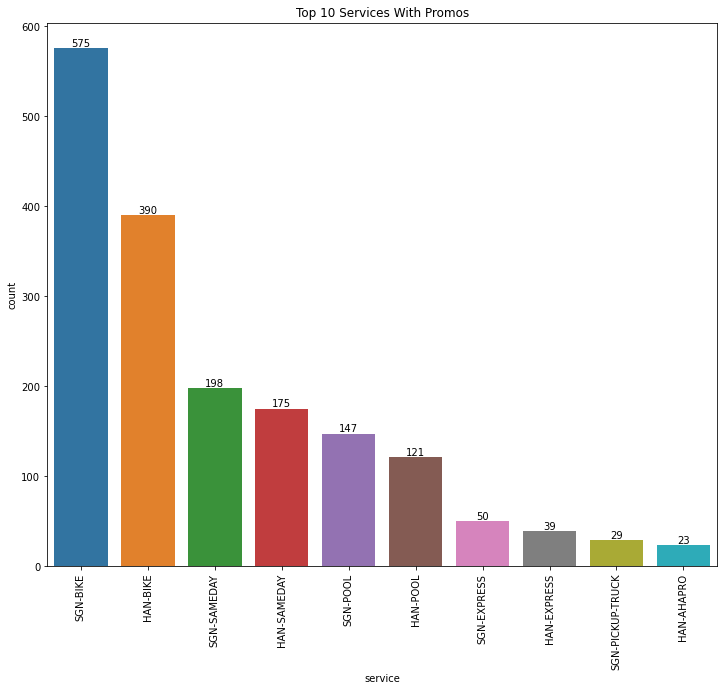

In [263]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_usepromo_s['service'], order = count_ups.index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 Services With Promos')
plt.show()

### Promo via Event and Promo Count:

In [267]:
df_nopro_e = df_promo[df_promo['promo_code'] == 'Not Available']
df_nopro_e 

,user_id,promo_code,event_type
0,84878755195,Not Available,Notification_order_complete_system_show
1,84973748869,Not Available,App_start
2,84355933878,Not Available,_session.stop
3,84962698888,Not Available,Notification_order_complete_system_show
4,84793758561,Not Available,App_start
...,...,...,...
99993,84937976482,Not Available,NewOrder_continue
99995,84907394047,Not Available,_session.stop
99996,84907394047,Not Available,_session.start
99997,84937976482,Not Available,PlaceOrder_add_promo_code


In [268]:
count_npe = df_nopro_e.groupby('event_type').count()['promo_code'].sort_values(ascending = False).head(10)
count_npe

event_type
App_start                          2389
Screen_Home                        2145
_session.start                     2030
_session.stop                      2014
_session.pause                     1758
Screen_SearchLocation              1133
Screen_NewOrder                    1104
Screen_RecipientInfo               1044
NewOrder_add_recipient_info         996
RecipientInfo_click_btn_Confirm     984
Name: promo_code, dtype: int64

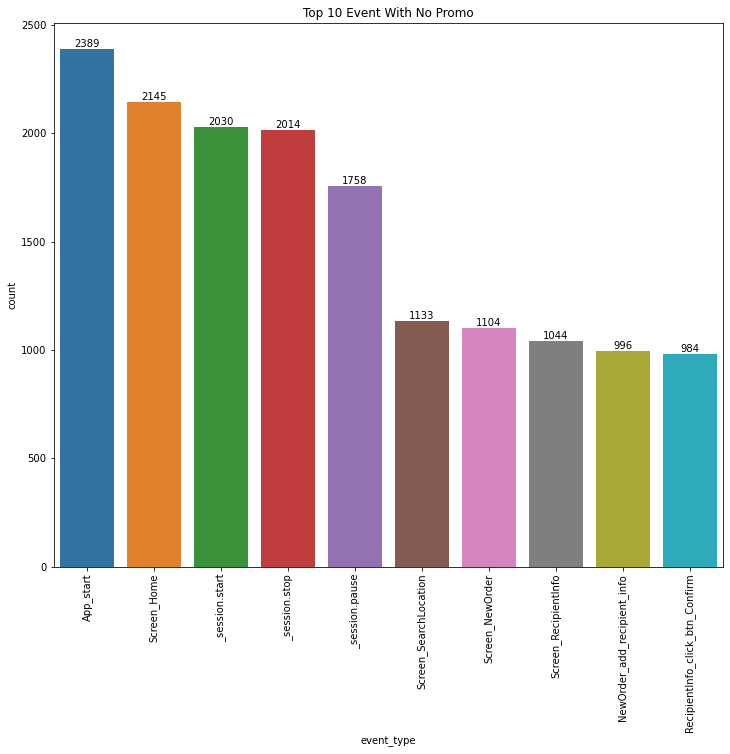

In [271]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_nopro_e['event_type'], order = count_npe.index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 Event With No Promo')
plt.show()

In [270]:
df_pro_e = df_promo[df_promo['promo_code'] != 'Not Available']
df_pro_e 

,user_id,promo_code,event_type
590,84338533786,4H22K,MyPromoCode_select
594,84338533786,4H22K,MyDetailsPromoCode_click_btn_ApplyNow
595,84338533786,4H22K,PlaceOrder_add_promo_code
598,84338533786,4H22K,PlaceOrder_inform_promo
838,84898530778,nil,PlaceOrder_add_promo_code
...,...,...,...
99461,84798050997,AHA6KGIAM,PlaceOrder_book_btn
99473,84984663345,THUANDD,PlaceOrder_add_promo_code
99474,84984663345,THUANDD,MyPromoCode_click_btn_UseCustomPromoCode
99508,84969344856,AHAMOVEM10,PlaceOrder_book_btn


In [272]:
count_upe = df_pro_e.groupby('event_type').count()['promo_code'].sort_values(ascending = False).head(10)
count_upe

event_type
PlaceOrder_add_promo_code                   558
PlaceOrder_inform_promo                     410
MyPromoCode_click_btn_UseNow                295
PlaceOrder_book_btn                         216
MyPromoCode_select                          138
MyDetailsPromoCode_click_btn_ApplyNow       127
News_item_clicked                            11
MyPromoCode_click_btn_UseCustomPromoCode     10
News_dialog_book_now_btn                      1
Name: promo_code, dtype: int64

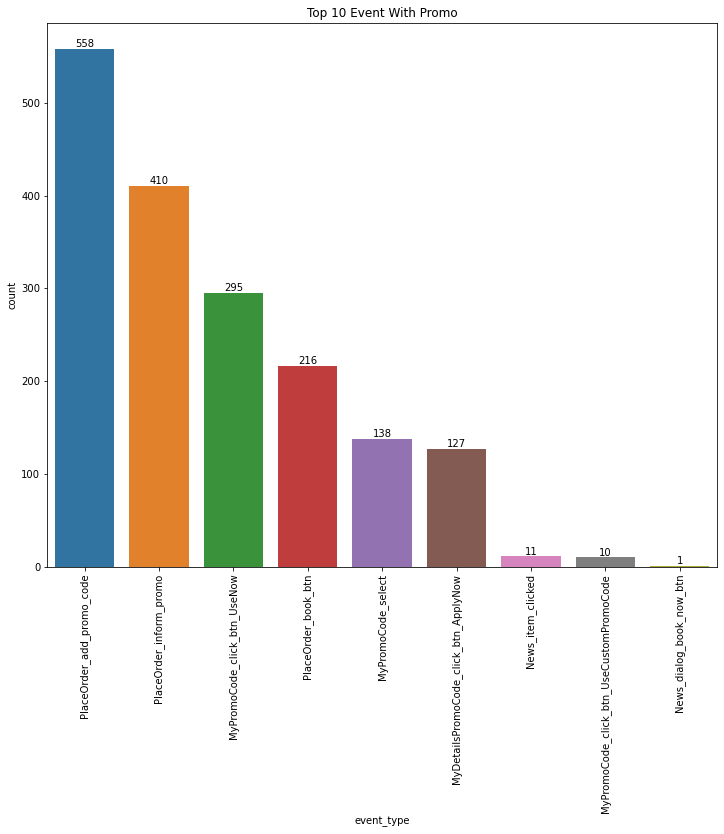

In [273]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_pro_e['event_type'], order = count_upe.index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 Event With Promo')
plt.show()

In [275]:
promo_count = df_pro_e.groupby('promo_code').count()['user_id'].sort_values(ascending = False).head(10)
promo_count

promo_code
AHAMOVEM10                611
4H22K                     266
nil                        67
ZALOPAY1022                59
BDBHT10                    47
HELLOLA                    47
HAIPHONGT10                36
VUNGTAUT10                 31
BACNINHT10                 27
Optional("AHAMOVEM10")     22
Name: user_id, dtype: int64

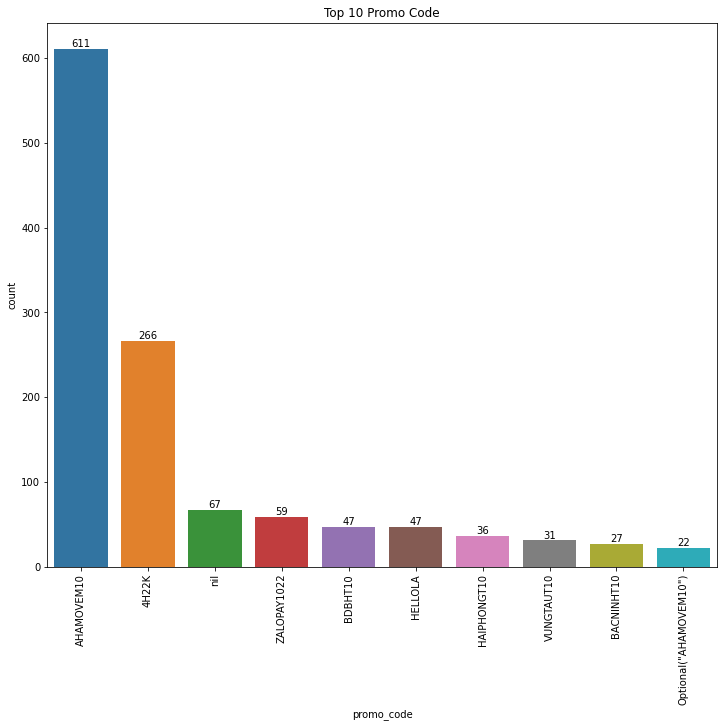

In [277]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df_pro_e['promo_code'], order = promo_count.index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 Promo Code')
plt.show()

### No Promo Users:
- The number of users in Ho Chi Minh City and Hanoi City who hadn't used promo code was the most.
- The number of users with SGN-Bike and HAN-Bike service who hadn't used promo code was the most.
- The number of users of App_start event who hadn't used promo code was the most.

### Promo Users:
- The number of users in Ho Chi Minh City who had used promo code was the most.
- The number of users with SGN-Bike service who had used promo code was the most.
- The number of users of PlaceOrder_add_promo_code event who had used promo code was the most.
- The AHAMOVEM10 is the best promo code, which had been used the most.

# Task 3: Analyze the Staff Data:

In [472]:
df_staff = pd.read_csv('BDS-Test.csv')
df_staff

,Candidate will have 72 hours in order to accomplish the test.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,The final result should be written only in Vie...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Instructions,Please feel free to use any tools for analysis...,NaN,NaN,NaN,NaN,NaN
3,NaN,Bonus Question is for your choice to answer. W...,NaN,NaN,NaN,NaN,NaN
4,NaN,Please refer to RawData sheet to answer below ...,NaN,NaN,NaN,NaN,NaN
5,NaN,Good luck & have fun.,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Qs 1,Analyze Ahamove's business by SWOT model,NaN,NaN,NaN,NaN,NaN
9,Analytics test,NaN,NaN,NaN,NaN,NaN,NaN


# Seperate Data:

In [602]:
df_staff = pd.read_csv('BDS-Test.csv', skiprows = range (0,18), nrows=14, header = 1)
df_staff = df_staff.drop(columns=[col for col in df_staff.columns if 'Unnamed' in col])
df_staff

,name,id,staff,city,start_date,end_date
0,Nguyễn Đình Phương Ly,2031680,LyNDP,SGN,06/08/2020,NaN
1,Vũ Thị Nhài,2031681,NhaiVT,HAN,06/09/2020,03/31/2021
2,Trần Thu Hường,258037,HuongTT1,HAN,08/18/2022,NaN
3,Trần Thị Trà,2032070,TraTT,HAN,06/16/2020,03/31/2022
4,Nguyễn Kim Đát,2047200,DatNK,HAN,06/17/2020,NaN
5,Võ Gia Huy,2035235,HuyVG,SGN,06/22/2020,07/10/2020
6,Bùi Thị Yến Thi,2035234,ThiBTY,SGN,06/22/2020,NaN
7,Nguyễn Thanh Tuyền,2035368,TuyenNT,SGN,06/22/2020,05/31/2021
8,Đỗ Thị Huỳnh Như,258036,NhuDTH,SGN,08/18/2022,NaN
9,Hồ Thị Ba,2035699,BaHT,SGN,06/29/2020,07/20/2020


# Data Cleaning:

In [603]:
df_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        14 non-null     object
 1   id          14 non-null     int64 
 2   staff       14 non-null     object
 3   city        14 non-null     object
 4   start_date  14 non-null     object
 5   end_date    6 non-null      object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [604]:
df_staff.dtypes

name          object
id             int64
staff         object
city          object
start_date    object
end_date      object
dtype: object

In [605]:
df_staff['start_date'] = pd.to_datetime(df_staff['start_date'])
df_staff.dtypes

name                  object
id                     int64
staff                 object
city                  object
start_date    datetime64[ns]
end_date              object
dtype: object

In [606]:
df_staff = df_staff.fillna('03/09/2023')
df_staff

,name,id,staff,city,start_date,end_date
0,Nguyễn Đình Phương Ly,2031680,LyNDP,SGN,2020-06-08,03/09/2023
1,Vũ Thị Nhài,2031681,NhaiVT,HAN,2020-06-09,03/31/2021
2,Trần Thu Hường,258037,HuongTT1,HAN,2022-08-18,03/09/2023
3,Trần Thị Trà,2032070,TraTT,HAN,2020-06-16,03/31/2022
4,Nguyễn Kim Đát,2047200,DatNK,HAN,2020-06-17,03/09/2023
5,Võ Gia Huy,2035235,HuyVG,SGN,2020-06-22,07/10/2020
6,Bùi Thị Yến Thi,2035234,ThiBTY,SGN,2020-06-22,03/09/2023
7,Nguyễn Thanh Tuyền,2035368,TuyenNT,SGN,2020-06-22,05/31/2021
8,Đỗ Thị Huỳnh Như,258036,NhuDTH,SGN,2022-08-18,03/09/2023
9,Hồ Thị Ba,2035699,BaHT,SGN,2020-06-29,07/20/2020


In [607]:
df_staff['end_date'] = pd.to_datetime(df_staff['end_date'])
df_staff.dtypes

name                  object
id                     int64
staff                 object
city                  object
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object

## 1) Create a query to calculate the span (in days) between the hire date of the employee with the longest tenure and the hire date of the employee with the shortest tenure who is still currently employed at the company.

In [611]:
df_staff_cur = df_staff[df_staff['end_date'] =='2023-03-09']
df_staff_cur

,name,id,staff,city,start_date,end_date
0,Nguyễn Đình Phương Ly,2031680,LyNDP,SGN,2020-06-08,2023-03-09
2,Trần Thu Hường,258037,HuongTT1,HAN,2022-08-18,2023-03-09
4,Nguyễn Kim Đát,2047200,DatNK,HAN,2020-06-17,2023-03-09
6,Bùi Thị Yến Thi,2035234,ThiBTY,SGN,2020-06-22,2023-03-09
8,Đỗ Thị Huỳnh Như,258036,NhuDTH,SGN,2022-08-18,2023-03-09
11,Lê Tuấn Anh,258064,AnhLT,SGN,2022-09-19,2023-03-09
12,Hoàng Cao Văn Dương,258074,DuongHCV,SGN,2022-10-04,2023-03-09
13,Cao Bá Huỳnh,2034489,HuynhCB,HAN,2020-07-16,2023-03-09


In [615]:
span_day = df_staff_cur['start_date'].max() - df_staff_cur['start_date'].min()
span_day

Timedelta('848 days 00:00:00')

## 2) Using the employee table, write a query that finds the longest period (in days) during which no employee was hired or fired. 								

In [616]:
df_hired_date = df_staff.sort_values(by = 'start_date', ascending = True)
df_hired_date

,name,id,staff,city,start_date,end_date
0,Nguyễn Đình Phương Ly,2031680,LyNDP,SGN,2020-06-08,2023-03-09
1,Vũ Thị Nhài,2031681,NhaiVT,HAN,2020-06-09,2021-03-31
3,Trần Thị Trà,2032070,TraTT,HAN,2020-06-16,2022-03-31
4,Nguyễn Kim Đát,2047200,DatNK,HAN,2020-06-17,2023-03-09
5,Võ Gia Huy,2035235,HuyVG,SGN,2020-06-22,2020-07-10
6,Bùi Thị Yến Thi,2035234,ThiBTY,SGN,2020-06-22,2023-03-09
7,Nguyễn Thanh Tuyền,2035368,TuyenNT,SGN,2020-06-22,2021-05-31
9,Hồ Thị Ba,2035699,BaHT,SGN,2020-06-29,2020-07-20
10,Phan Thị Thu Thảo,2034937,ThaoPTT,SGN,2020-07-06,2020-08-23
13,Cao Bá Huỳnh,2034489,HuynhCB,HAN,2020-07-16,2023-03-09


In [617]:
df_hired_date['hire_diff'] = df_hired_date['start_date'].diff()
df_hired_date

,name,id,staff,city,start_date,end_date,hire_diff
0,Nguyễn Đình Phương Ly,2031680,LyNDP,SGN,2020-06-08,2023-03-09,NaT
1,Vũ Thị Nhài,2031681,NhaiVT,HAN,2020-06-09,2021-03-31,1 days
3,Trần Thị Trà,2032070,TraTT,HAN,2020-06-16,2022-03-31,7 days
4,Nguyễn Kim Đát,2047200,DatNK,HAN,2020-06-17,2023-03-09,1 days
5,Võ Gia Huy,2035235,HuyVG,SGN,2020-06-22,2020-07-10,5 days
6,Bùi Thị Yến Thi,2035234,ThiBTY,SGN,2020-06-22,2023-03-09,0 days
7,Nguyễn Thanh Tuyền,2035368,TuyenNT,SGN,2020-06-22,2021-05-31,0 days
9,Hồ Thị Ba,2035699,BaHT,SGN,2020-06-29,2020-07-20,7 days
10,Phan Thị Thu Thảo,2034937,ThaoPTT,SGN,2020-07-06,2020-08-23,7 days
13,Cao Bá Huỳnh,2034489,HuynhCB,HAN,2020-07-16,2023-03-09,10 days


In [485]:
df_hired_date['hire_diff'].max()

Timedelta('763 days 00:00:00')

- The longest period (in days) during which no employee was hired was 763 days

In [618]:
df_fired_date = df_staff.sort_values(by = 'end_date', ascending = True)
df_fired_date

,name,id,staff,city,start_date,end_date
5,Võ Gia Huy,2035235,HuyVG,SGN,2020-06-22,2020-07-10
9,Hồ Thị Ba,2035699,BaHT,SGN,2020-06-29,2020-07-20
10,Phan Thị Thu Thảo,2034937,ThaoPTT,SGN,2020-07-06,2020-08-23
1,Vũ Thị Nhài,2031681,NhaiVT,HAN,2020-06-09,2021-03-31
7,Nguyễn Thanh Tuyền,2035368,TuyenNT,SGN,2020-06-22,2021-05-31
3,Trần Thị Trà,2032070,TraTT,HAN,2020-06-16,2022-03-31
0,Nguyễn Đình Phương Ly,2031680,LyNDP,SGN,2020-06-08,2023-03-09
2,Trần Thu Hường,258037,HuongTT1,HAN,2022-08-18,2023-03-09
4,Nguyễn Kim Đát,2047200,DatNK,HAN,2020-06-17,2023-03-09
6,Bùi Thị Yến Thi,2035234,ThiBTY,SGN,2020-06-22,2023-03-09


In [619]:
df_fired_date['fire_diff'] = df_fired_date['end_date'].diff()
df_fired_date

,name,id,staff,city,start_date,end_date,fire_diff
5,Võ Gia Huy,2035235,HuyVG,SGN,2020-06-22,2020-07-10,NaT
9,Hồ Thị Ba,2035699,BaHT,SGN,2020-06-29,2020-07-20,10 days
10,Phan Thị Thu Thảo,2034937,ThaoPTT,SGN,2020-07-06,2020-08-23,34 days
1,Vũ Thị Nhài,2031681,NhaiVT,HAN,2020-06-09,2021-03-31,220 days
7,Nguyễn Thanh Tuyền,2035368,TuyenNT,SGN,2020-06-22,2021-05-31,61 days
3,Trần Thị Trà,2032070,TraTT,HAN,2020-06-16,2022-03-31,304 days
0,Nguyễn Đình Phương Ly,2031680,LyNDP,SGN,2020-06-08,2023-03-09,343 days
2,Trần Thu Hường,258037,HuongTT1,HAN,2022-08-18,2023-03-09,0 days
4,Nguyễn Kim Đát,2047200,DatNK,HAN,2020-06-17,2023-03-09,0 days
6,Bùi Thị Yến Thi,2035234,ThiBTY,SGN,2020-06-22,2023-03-09,0 days


In [488]:
df_fired_date['fire_diff'].max()

Timedelta('341 days 00:00:00')

- The longest period (in days) during which no employee was fired was 341 days

## 3) Create a query that returns each employee along with the maximum number of employees who worked for the company during their tenure, and the first date on which this maximum number was reached. 								

In [620]:
count = 1
for d in df_hired_date['start_date']:
    df_hired_date['aq_date'] = count
df_hired_date = df_hired_date.reset_index()
df_hired_date

,index,name,id,staff,city,start_date,end_date,hire_diff,aq_date
0,0,Nguyễn Đình Phương Ly,2031680,LyNDP,SGN,2020-06-08,2023-03-09,NaT,1
1,1,Vũ Thị Nhài,2031681,NhaiVT,HAN,2020-06-09,2021-03-31,1 days,1
2,3,Trần Thị Trà,2032070,TraTT,HAN,2020-06-16,2022-03-31,7 days,1
3,4,Nguyễn Kim Đát,2047200,DatNK,HAN,2020-06-17,2023-03-09,1 days,1
4,5,Võ Gia Huy,2035235,HuyVG,SGN,2020-06-22,2020-07-10,5 days,1
5,6,Bùi Thị Yến Thi,2035234,ThiBTY,SGN,2020-06-22,2023-03-09,0 days,1
6,7,Nguyễn Thanh Tuyền,2035368,TuyenNT,SGN,2020-06-22,2021-05-31,0 days,1
7,9,Hồ Thị Ba,2035699,BaHT,SGN,2020-06-29,2020-07-20,7 days,1
8,10,Phan Thị Thu Thảo,2034937,ThaoPTT,SGN,2020-07-06,2020-08-23,7 days,1
9,13,Cao Bá Huỳnh,2034489,HuynhCB,HAN,2020-07-16,2023-03-09,10 days,1


In [621]:
df_date_aq = df_hired_date[['start_date','aq_date']]
df_date_aq

,start_date,aq_date
0,2020-06-08,1
1,2020-06-09,1
2,2020-06-16,1
3,2020-06-17,1
4,2020-06-22,1
5,2020-06-22,1
6,2020-06-22,1
7,2020-06-29,1
8,2020-07-06,1
9,2020-07-16,1


In [622]:
df_date_aq = df_date_aq.rename(columns = {'start_date':'date'})
df_date_aq

,date,aq_date
0,2020-06-08,1
1,2020-06-09,1
2,2020-06-16,1
3,2020-06-17,1
4,2020-06-22,1
5,2020-06-22,1
6,2020-06-22,1
7,2020-06-29,1
8,2020-07-06,1
9,2020-07-16,1


In [630]:
df_fired = df_fired_date[df_fired_date['end_date'] != '2023-03-09']
df_fired

,name,id,staff,city,start_date,end_date,fire_diff
5,Võ Gia Huy,2035235,HuyVG,SGN,2020-06-22,2020-07-10,NaT
9,Hồ Thị Ba,2035699,BaHT,SGN,2020-06-29,2020-07-20,10 days
10,Phan Thị Thu Thảo,2034937,ThaoPTT,SGN,2020-07-06,2020-08-23,34 days
1,Vũ Thị Nhài,2031681,NhaiVT,HAN,2020-06-09,2021-03-31,220 days
7,Nguyễn Thanh Tuyền,2035368,TuyenNT,SGN,2020-06-22,2021-05-31,61 days
3,Trần Thị Trà,2032070,TraTT,HAN,2020-06-16,2022-03-31,304 days


In [631]:
count2 = -1
for e in df_fired['end_date']:
    df_fired['aq_date'] = count2
df_fired = df_fired.reset_index()
df_fired

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_56133/1724878478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fired['aq_date'] = count2


,index,name,id,staff,city,start_date,end_date,fire_diff,aq_date
0,5,Võ Gia Huy,2035235,HuyVG,SGN,2020-06-22,2020-07-10,NaT,-1
1,9,Hồ Thị Ba,2035699,BaHT,SGN,2020-06-29,2020-07-20,10 days,-1
2,10,Phan Thị Thu Thảo,2034937,ThaoPTT,SGN,2020-07-06,2020-08-23,34 days,-1
3,1,Vũ Thị Nhài,2031681,NhaiVT,HAN,2020-06-09,2021-03-31,220 days,-1
4,7,Nguyễn Thanh Tuyền,2035368,TuyenNT,SGN,2020-06-22,2021-05-31,61 days,-1
5,3,Trần Thị Trà,2032070,TraTT,HAN,2020-06-16,2022-03-31,304 days,-1


In [632]:
df_date_fq = df_fired[['end_date','aq_date']]
df_date_fq

,end_date,aq_date
0,2020-07-10,-1
1,2020-07-20,-1
2,2020-08-23,-1
3,2021-03-31,-1
4,2021-05-31,-1
5,2022-03-31,-1


In [633]:
df_date_fq = df_date_fq.rename(columns = {'end_date':'date'})
df_date_fq

,date,aq_date
0,2020-07-10,-1
1,2020-07-20,-1
2,2020-08-23,-1
3,2021-03-31,-1
4,2021-05-31,-1
5,2022-03-31,-1


In [634]:
df_union = pd.concat([df_date_aq,df_date_fq], ignore_index = True)
df_union

,date,aq_date
0,2020-06-08,1
1,2020-06-09,1
2,2020-06-16,1
3,2020-06-17,1
4,2020-06-22,1
5,2020-06-22,1
6,2020-06-22,1
7,2020-06-29,1
8,2020-07-06,1
9,2020-07-16,1


In [635]:
df_union_c = df_union.groupby('date').sum().reset_index()
df_union_c

,date,aq_date
0,2020-06-08,1
1,2020-06-09,1
2,2020-06-16,1
3,2020-06-17,1
4,2020-06-22,3
5,2020-06-29,1
6,2020-07-06,1
7,2020-07-10,-1
8,2020-07-16,1
9,2020-07-20,-1


In [636]:
df_union_c['maxemp'] = ''
for i in range (1,18):
    df_union_c['maxemp'].iloc[i-1] = df_union_c['aq_date'].iloc[0:i].sum()
    i = i +1
df_union_c

/Users/ricardokaizen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,date,aq_date,maxemp
0,2020-06-08,1,1
1,2020-06-09,1,2
2,2020-06-16,1,3
3,2020-06-17,1,4
4,2020-06-22,3,7
5,2020-06-29,1,8
6,2020-07-06,1,9
7,2020-07-10,-1,8
8,2020-07-16,1,9
9,2020-07-20,-1,8


- I have finished the solution of this task with SQL, but this is my current solution with Python. I'm still in process with this solution.